In [40]:
from transformers import AutoTokenizer

In [41]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large")

def count_bart_tokens(text: str) -> int:
    return len(tokenizer.encode(text, add_special_tokens=True))


In [42]:
import json

with open("../data/base_outputs.json", "r", encoding="utf-8") as f:
    data = json.load(f)

In [43]:
model0_outputs = []
for i in data:
    model0_outputs.append(i[1])

In [4]:
outputs_sizes = []
for i in data:
    outputs_sizes.append(count_bart_tokens(i[1]))
print(len(outputs_sizes))

Token indices sequence length is longer than the specified maximum sequence length for this model (1538 > 1024). Running this sequence through the model will result in indexing errors


101


7


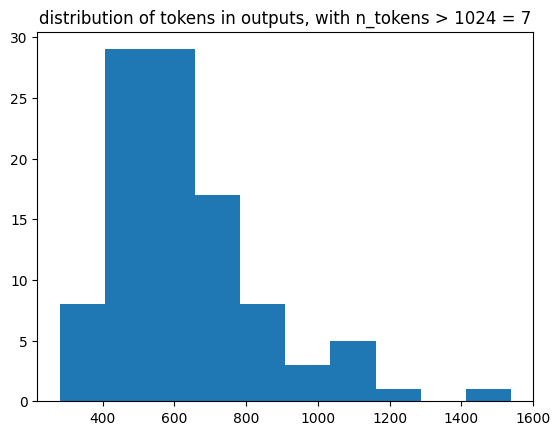

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.title("distribution of tokens in outputs, with n_tokens > 1024 = 7")
plt.hist(outputs_sizes)

out = np.array(outputs_sizes)
print(np.count_nonzero(out > 1024))


In [14]:
import json

with open("../data/custom_dataset.jsonl", "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]


In [11]:
outputs_sizes = []
for i in data:
        outputs_sizes.append(count_bart_tokens(i["messages"][2]["content"]))

print(len(outputs_sizes))

1004


0


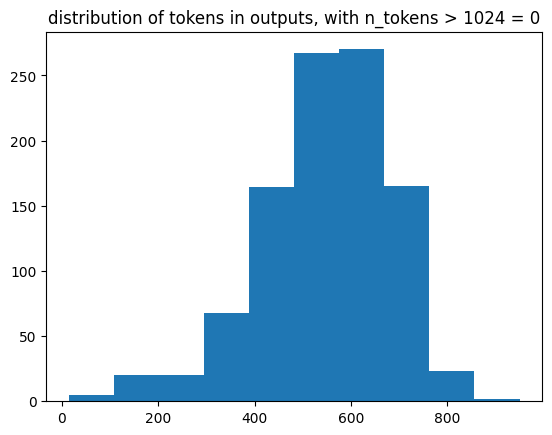

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.title("distribution of tokens in outputs, with n_tokens > 1024 = 0")
plt.hist(outputs_sizes)

out = np.array(outputs_sizes)
print(np.count_nonzero(out > 1024))

In [ ]:
from datasets import Dataset
data = []
with open("../data/custom_dataset.jsonl", "r") as f:
    for line in f:
        data.append(json.loads(line))

custom_dataset = Dataset.from_dict({
    "messages": [item["messages"] for item in data]
})
split_dataset = custom_dataset.train_test_split(test_size=0.1, seed=42)
test_dataset = split_dataset["test"]

print(f"✓ Loaded {len(test_dataset)} examples")

✓ Loaded 101 examples


In [27]:
test_data = []
for i in test_dataset:
    test_data.append(i["messages"][2]["content"])


print(len(test_data))
print(test_data[1])

101
VIDEO_1 focuses on the long scientific search for the real purpose of zebra stripes. It explains how many early theories, like social recognition, cooling effects, or predator confusion, do not hold up when tested. The video highlights strong evidence that the stripes disrupt the ability of biting flies to land properly, reducing disease carrying bites. It also includes historical attempts to domesticate zebras and shows how their behavior and defenses made that impossible. The main insight is that striping is most convincingly linked to protection from biting flies.

VIDEO_2 gives a more playful explanation but covers several scientific ideas. It discusses camouflage based on how predators see mostly gray shapes, as well as herd movement creating optical illusions that may confuse predators. It also mentions that striping helps repel biting insects, with narrow stripes being especially unappealing to horse flies. The video adds that stripe patterns are unique and might help zebras